In [ ]:
#загрузка библиотек
import pandas as pd
import numpy as np

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [ ]:
data = pd.read_csv('Advertising.zip')
df = data.copy()
df.head()

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [ ]:
df.isnull().sum()

In [ ]:
df = df.drop(['Unnamed: 0'], axis =1)
df.info()

In [ ]:
# Чтобы не использовать .drop(['Unnamed: 0'], axis =1) можно сразу прочитать с параметром index_col = 0

df = pd.read_csv('Advertising.zip', index_col = 0)
df.head()


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [ ]:
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [ ]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [ ]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [ ]:
X.shape

In [ ]:
num_iters = 250000
m = 200
n = 4
w = np.zeros((X.shape[1], 1))

def gradient_descent(X, y, w, num_iters):
    m, n = X.shape
    
    for i in range(num_iters):
        for k in range(n):
            h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
            w[k] =  (X[:,k].T @ (y - h))
            
            cost = sum(((X @ w) - y) ** 2)/(len(y))   
    return w

w_optimal = gradient_descent(X, y, w, num_iters)
print("Оптимальные коэффициенты:", w_optimal)
# тут можно было записать вектор весов в более привычном виде и далее это бы сильно упростило алгоритм 

In [ ]:
# Зачем так много итераций? Уже после 100 получаются вполне приличные результаты
num_iters = 100
m = 200
n = 4
w = np.zeros((X.shape[1], 1))

def gradient_descent(X, y, w, num_iters):
    m, n = X.shape
    
    for i in range(num_iters):
        for k in range(n):
            h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
            w[k] =  (X[:,k].T @ (y - h))
            
            cost = sum(((X @ w) - y) ** 2)/(len(y))   
    return w

w_optimal = gradient_descent(X, y, w, num_iters)
print("Оптимальные коэффициенты:", w_optimal)

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [ ]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [ ]:
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

In [ ]:
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = (X - mean)/ std

**Добавим единичный столбец**

In [ ]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

In [ ]:
X.shape

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [ ]:
def mse_error(y, y_pred):
    return np.mean((y - y_pred)**2)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [ ]:
mean_y = np.mean(y)
y_pred = np.full_like(y, mean_y)
mse = mse_error(y, y_pred)
print("MSE =",mse.round(2))

# как сложно) я бы делал как-то так:
print(f"MSE = {mse_error(y, np.mean(y)).round(2)}")

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [ ]:
def lin_pred(X, w):
    return np.dot(X, w)

predict = lin_pred(X, w)
print(np.mean(predict)) # зачем выводить средние по прогнозу не понятно, но ок пусть будет 

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [ ]:
def stoch_grad_step(X, y, w, train_ind, eta):
    x_i = X[train_ind]
    y_pred = np.dot(x_i, w)
    direction = 2 * x_i * (y_pred - y[train_ind]) / len(y)
    new_w = w - eta * direction
    return new_w

train_ind = 1
eta = 0.01

new_w = stoch_grad_step(X, y, w, train_ind, eta)
print("Новые веса\n", new_w)
# Из-за неудачной размерности вектора весов w, тут мы получаем не один шаг а целое семейство новых векторов w
# возможно это имеет смысл, но нужно дальше исследовать алгорит. На данном этапе я бы защитал это ошибкой

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [ ]:
def stochastic_gradient_descent(X, y, w, eta, max_iter, tol):
    errors = []
    prev_w_dist = np.inf
    iter_count = 0
    
    while prev_w_dist > tol and iter_count < max_iter:
        idx = np.random.randint(len(X))
        errors.append(lin_pred(X, w))
        w_step = stoch_grad_step(X, y, w, idx, eta)
        prev_w_dist = np.linalg.norm(w - w_step)
        w = w_step
        iter_count += 1
    
    return w, errors

eta = 0.01
max_iter = 1000
tol = 0.00001

w_final, errors = stochastic_gradient_descent(X, y, new_w, eta, max_iter, tol)
print("Финальные веса:", w_final)
print("Ошибки на каждой итерации:", errors)

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [ ]:
def stochastic_gradient_descent_2(X, y, w, eta, max_iter, tol, adaptive_lr=False, alpha=0.9, reg_param=0):
    errors = []
    prev_w_dist = np.inf
    iter_count = 0
    lr = eta
    
    while prev_w_dist > tol and iter_count < max_iter:
        idx = np.random.randint(len(X))
        errors.append(lin_pred(X, w))
        w_step = stoch_grad_step(X, y, w, idx, lr)
        
        if adaptive_lr:
            lr = alpha * lr + (1 - alpha) * np.linalg.norm(w - w_step)
        
        if reg_param > 0:
            w_step -= reg_param * w  # L2 regularization
            # круто, если вы сами прикрутили регуляризацию
            # не круто, если это результат работы ИИ
            # в любом случае алгорит не сходится к минимальной ошибке
            
        prev_w_dist = np.linalg.norm(w - w_step)
        w = w_step
        iter_count += 1
    
    return w, errors

eta = 0.1
max_iter = 100000
tol = 0.00001
new_w = np.zeros(X.shape[1])  # Initialize new weights
w_final, errors = stochastic_gradient_descent_2(X, y, new_w, eta, max_iter, tol, adaptive_lr=True, alpha=0.9, reg_param=0.001)
print("Финальные веса:", w_final)
print("Ошибки на каждой итерации:", errors)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(errors)), errors)
plt.xlabel('Итерации')
plt.ylabel('Ошибка')
plt.title('График ошибок на каждой итерации в стохастическом градиентном спуске')
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [ ]:
print("Финальные веса:", w_final)

**Выведите среднеквадратичную ошибку на последней итерации.**

In [ ]:
mse_error(y, errors[-1])

***
## Печально, что не вышло написать рабочий алгоритм
Проблемы начались ещё на этапе определения вектора w с размерностью (4, 1), гораздо легче было бы сразу привести его к виду (4,). 
Для примера приведу алгоритм сделанный мной

w = [ 41.56217205 110.13144155  73.52860638  -0.55006384]
w.shape = (4,)


Text(0.5, 1.0, 'График зависимости ошибок (MSE/MAE) от номера итерации')

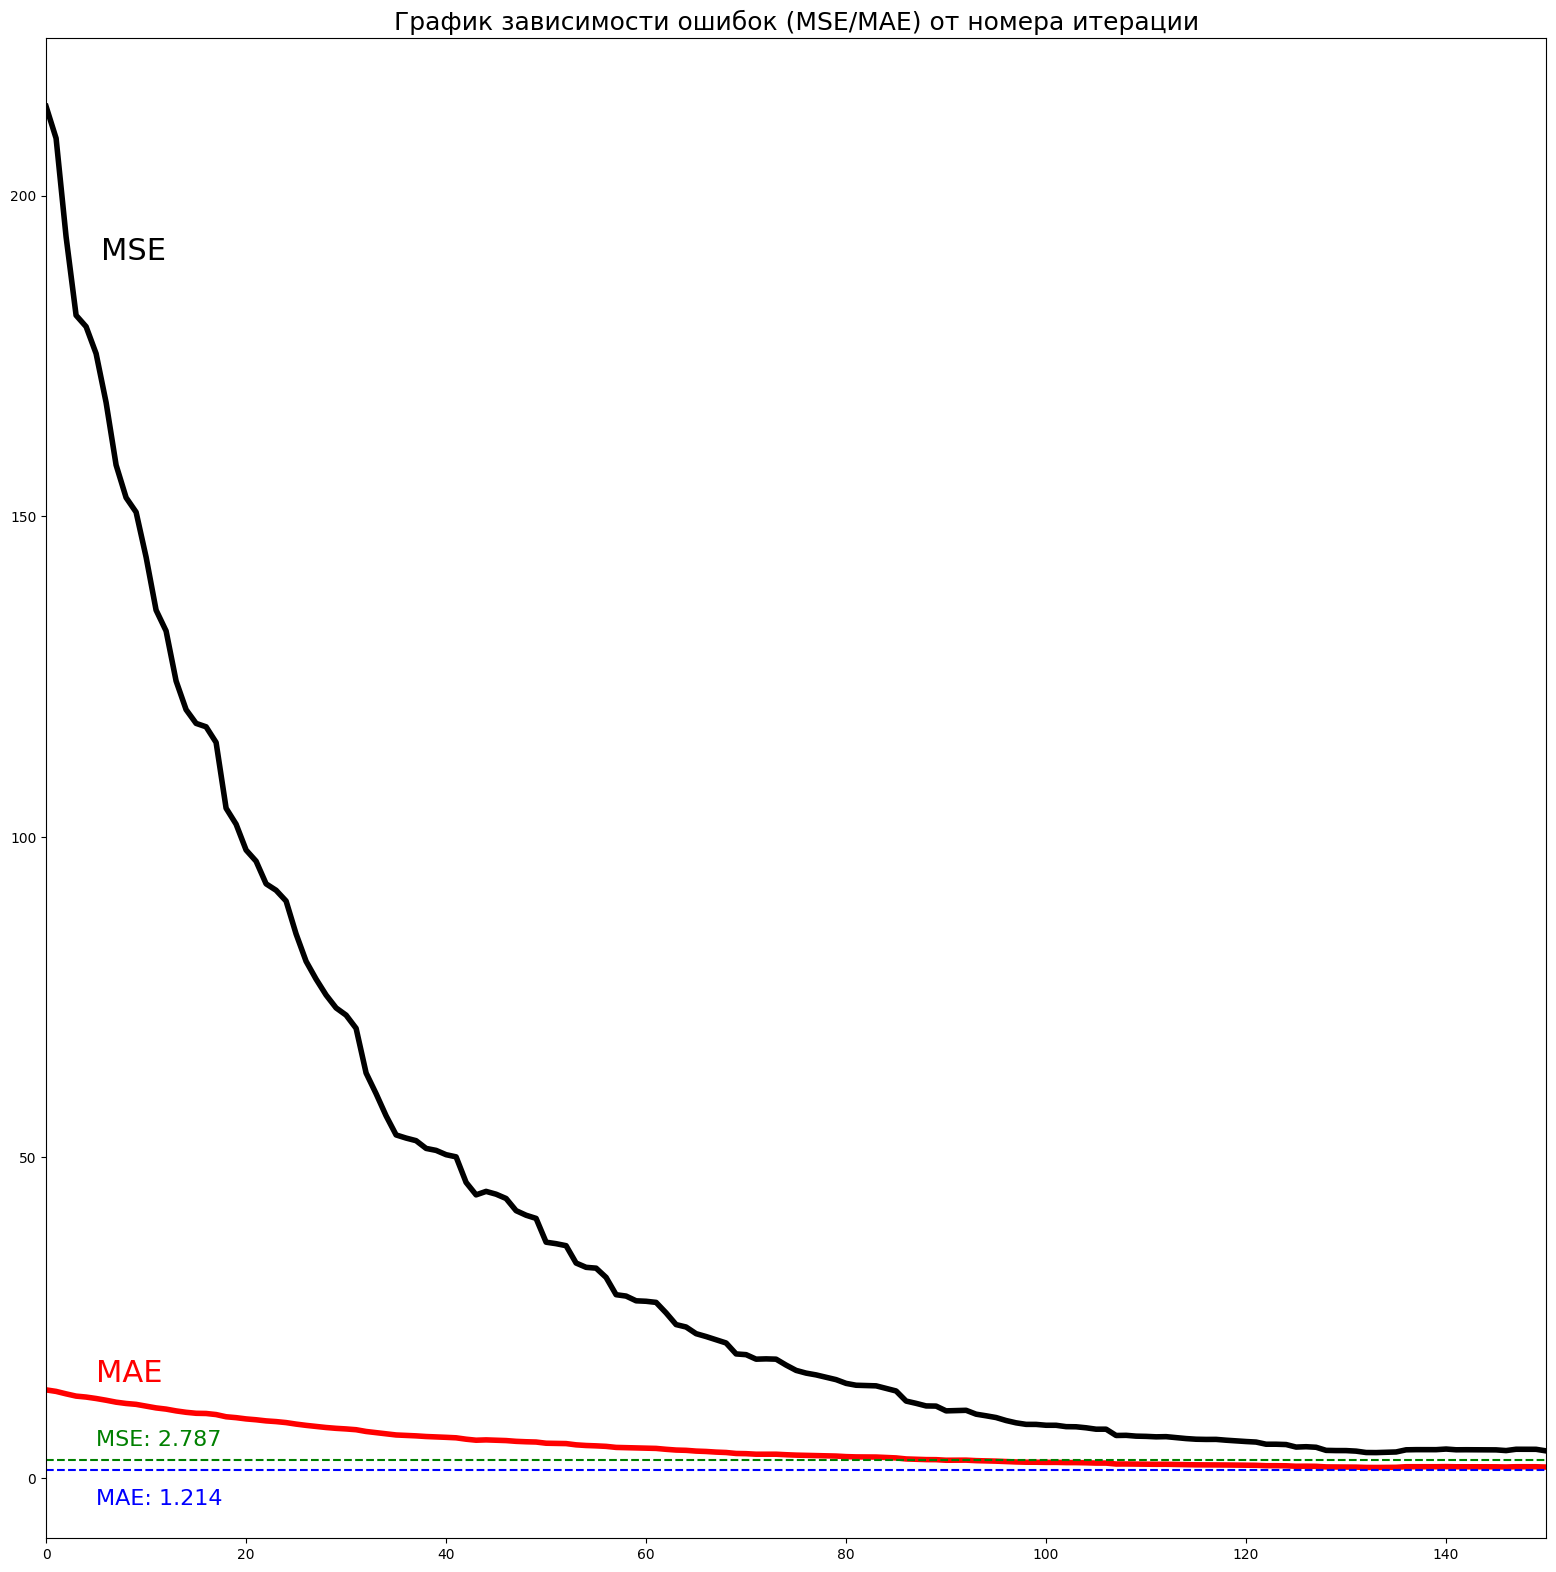

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Advertising.zip', index_col=0)
X = np.array(data[['TV','radio','newspaper']])
y = np.array(data['sales'])
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
X = X / np.sqrt(np.sum(np.square(X), axis=0))

num_iters = 130 # опытным путём добиваемся минимальной разницы с предсказаниями модели за меньшее число итерации
m = X.shape[0]
n = X.shape[1]
w = np.zeros((n,1))
for i in range(num_iters):

    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))
  
w = w.T[0]
print(f'w = {w}')
print(f'w.shape = {w.shape}')

X = np.array(data[['TV','radio','newspaper']])
X = (X - X.mean(axis=0)) / X.std(axis=0) 
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

def mse_error(y_real, y_pred):
    return np.square(np.subtract(y_real, y_pred)).mean()
def mae_error(y_real, y_pred):
    return np.mean(np.abs(y_real - y_pred))

def lin_reg(X, y):
    a = np.dot(X.T, X)
    b = np.dot(X.T, y)
    return np.linalg.solve(a, b)

w = lin_reg(X, y).T

def lin_pred(X,w):
    res = np.zeros([len(X),1])
    for i in range(len(X)):
        res[i] = (np.dot(w,X[i]))
    return res

y_pred = lin_pred(X, w)

def stoch_grad_step(X, y, w, train_ind, eta=0.01):
    w_new = 2 * eta * X[train_ind] * (np.dot(w, X[train_ind]) - y[train_ind]) / y[train_ind].size
    return (w - w_new)

def stochastic_gradient_descent(X, y, w, eta=0.1, max_iter=10000, min_distance=0.000001):
    distance = np.inf 
    w_init = w
    mse_errors = []
    mae_errors = []
    w_values_list = []
    iter_count = 0
    np.random.seed(42)
    while distance > min_distance and iter_count < max_iter:
        random_ind = np.random.randint(X.shape[0])
        distance = np.linalg.norm(w-stoch_grad_step(X, y, w, random_ind, eta))
        w_new = stoch_grad_step(X, y, w, random_ind, eta)
        mse_errors.append(mse_error(y, lin_pred(X, w_new)))
        mae_errors.append(mae_error(y, lin_pred(X, w_new)))
        w_values_list.append(w)
        w = w_new
        iter_count += 1  
    return w, w_values_list, mse_errors, mae_errors, iter_count

w, w_values, mse_errors, mae_errors, iter_count = stochastic_gradient_descent(X, y, np.zeros(4), 0.01, 10000, 0.0001)


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))
ax = fig.add_axes([0.3,0.3,1,1])
ax.plot(mse_errors, c='k', linewidth=4)
ax.plot(mae_errors, c='r', linewidth=4)
ax.set_xlim(0,150)
ax.hlines(np.array(mse_errors).min(),0,200, color='g', linestyle='--')
ax.text(5, 5, f'MSE: {round(np.array(mse_errors).min(),3)}', fontsize = 16, color='g')
ax.hlines(np.array(mae_errors).min(),0,200, color='b', linestyle='--')
ax.text(5, -4.2, f'MAE: {round(np.array(mae_errors).min(),3)}', fontsize = 16, color='b')
ax.text(5, 15, f'MAE', fontsize = 22, color='r')
ax.text(5.5, 190, f'MSE', fontsize = 22, color='k')
ax.set_title('График зависимости ошибок (MSE/MAE) от номера итерации',fontsize = 18)